In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-dev20190111


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is preferable to handwritten digit version because 1.) it's harder to archive near perfect classifications and, 2.) it's a better real word example.

There are multiple methods for loading the fashion MNIST data. The keras dataset is helpful in that it returns tuples for training and test data.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Labels are the numbers 0-9, but we will sometimes want to map these to the articles of clothing they represent. 

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Each pixel in input images is value from 0-255 but these need to be normalised to use as imput for the model. 

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Visualise the data to ensure it is correct.

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Building a model without weight regularisation or drop layers to server as baselane for the following models

In [4]:
baseline_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'sparse_categorical_crossentropy']
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
baseline_history = baseline_model.fit(train_images, train_labels, 
                                      epochs=20,
                                      validation_data=(test_images, test_labels),
                                      verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 5s - loss: 0.4989 - acc: 0.8244 - sparse_categorical_crossentropy: 0.4989 - val_loss: 0.5034 - val_acc: 0.8140 - val_sparse_categorical_crossentropy: 0.5034
Epoch 2/20
60000/60000 - 5s - loss: 0.3733 - acc: 0.8656 - sparse_categorical_crossentropy: 0.3733 - val_loss: 0.3879 - val_acc: 0.8607 - val_sparse_categorical_crossentropy: 0.3879
Epoch 3/20
60000/60000 - 5s - loss: 0.3381 - acc: 0.8770 - sparse_categorical_crossentropy: 0.3381 - val_loss: 0.3766 - val_acc: 0.8626 - val_sparse_categorical_crossentropy: 0.3766
Epoch 4/20
60000/60000 - 5s - loss: 0.3134 - acc: 0.8844 - sparse_categorical_crossentropy: 0.3134 - val_loss: 0.3643 - val_acc: 0.8702 - val_sparse_categorical_crossentropy: 0.3643
Epoch 5/20
60000/60000 - 5s - loss: 0.2939 - acc: 0.8914 - sparse_categorical_crossentropy: 0.2939 - val_loss: 0.3420 - val_acc: 0.8784 - val_sparse_categorical_crossentropy: 0.3420
Epoch 6/20
60000/60000 - 5s - loss: 0.27

In this model we attempt to address overfitting by adding a regularisation layer. The task of the regulariser is to penalise nodes with large values.

In [7]:
reg_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001), 
                          activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

reg_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'sparse_categorical_crossentropy']
)

In [8]:
reg_history = reg_model.fit(train_images, train_labels, 
                            epochs=20,
                            validation_data=(test_images, test_labels),
                            verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 5s - loss: 0.6444 - acc: 0.8200 - sparse_categorical_crossentropy: 0.5184 - val_loss: 0.5735 - val_acc: 0.8275 - val_sparse_categorical_crossentropy: 0.4793
Epoch 2/20
60000/60000 - 5s - loss: 0.5117 - acc: 0.8493 - sparse_categorical_crossentropy: 0.4264 - val_loss: 0.4991 - val_acc: 0.8502 - val_sparse_categorical_crossentropy: 0.4185
Epoch 3/20
60000/60000 - 5s - loss: 0.4799 - acc: 0.8557 - sparse_categorical_crossentropy: 0.4021 - val_loss: 0.4935 - val_acc: 0.8533 - val_sparse_categorical_crossentropy: 0.4175
Epoch 4/20
60000/60000 - 5s - loss: 0.4634 - acc: 0.8606 - sparse_categorical_crossentropy: 0.3873 - val_loss: 0.4803 - val_acc: 0.8529 - val_sparse_categorical_crossentropy: 0.4051
Epoch 5/20
60000/60000 - 5s - loss: 0.4484 - acc: 0.8647 - sparse_categorical_crossentropy: 0.3746 - val_loss: 0.4882 - val_acc: 0.8511 - val_sparse_categorical_crossentropy: 0.4148
Epoch 6/20
60000/60000 - 5s - loss: 0.43

In this model we again try to address overfitting but this time we add a dropout layer. 

In [10]:
drop_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

drop_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'sparse_categorical_crossentropy']
)

In [11]:
drop_history = drop_model.fit(train_images, train_labels, 
                                  epochs=20,
                                  validation_data=(test_images, test_labels),
                                  verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 5s - loss: 0.6252 - acc: 0.7786 - sparse_categorical_crossentropy: 0.6252 - val_loss: 0.4472 - val_acc: 0.8393 - val_sparse_categorical_crossentropy: 0.4472
Epoch 2/20
60000/60000 - 5s - loss: 0.4767 - acc: 0.8272 - sparse_categorical_crossentropy: 0.4767 - val_loss: 0.4191 - val_acc: 0.8477 - val_sparse_categorical_crossentropy: 0.4191
Epoch 3/20
60000/60000 - 5s - loss: 0.4439 - acc: 0.8397 - sparse_categorical_crossentropy: 0.4439 - val_loss: 0.4189 - val_acc: 0.8464 - val_sparse_categorical_crossentropy: 0.4189
Epoch 4/20
60000/60000 - 6s - loss: 0.4246 - acc: 0.8462 - sparse_categorical_crossentropy: 0.4246 - val_loss: 0.3960 - val_acc: 0.8567 - val_sparse_categorical_crossentropy: 0.3960
Epoch 5/20
60000/60000 - 5s - loss: 0.4114 - acc: 0.8505 - sparse_categorical_crossentropy: 0.4114 - val_loss: 0.3763 - val_acc: 0.8619 - val_sparse_categorical_crossentropy: 0.3763
Epoch 6/20
60000/60000 - 5s - loss: 0.39

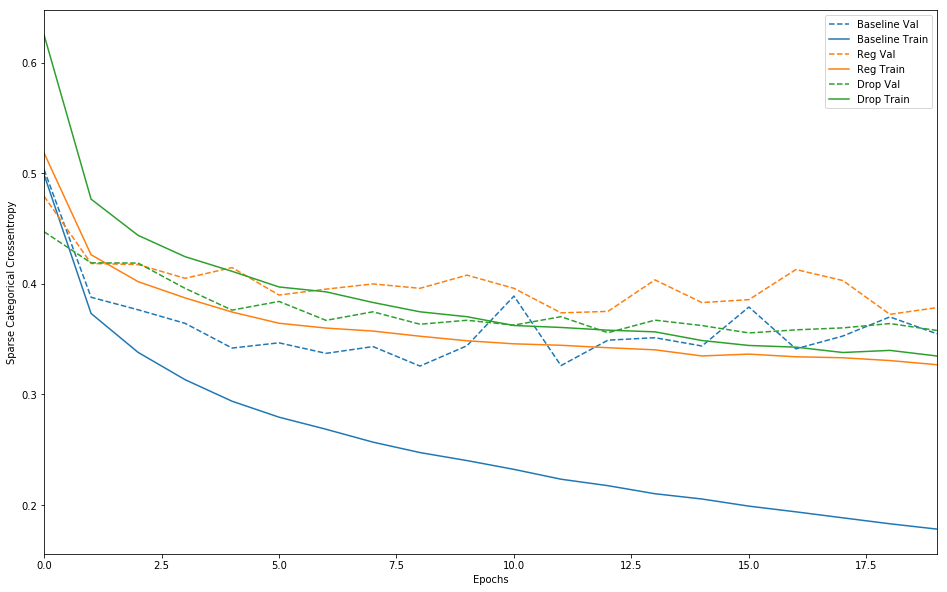

In [15]:
def plot_history(histories, key='sparse_categorical_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
    

plot_history([('baseline', baseline_history),
              ('reg', reg_history),
              ('drop', drop_history)])

From this chart I see regularization and dropout didn't improved the models ability to generalise and had the unexpected consequence of decreasing the accuracy to which the model fit the training data. Maybe the two stratergies would be move effective if the models capacity increased.  

In [ ]:
baseline_model.evaluate(test_images, test_labels)

In [16]:
predictions = baseline_model.predict(np.expand_dims(test_images[0], 0))

np.argmax(predictions[0])

9